In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys, os
import sklearn as skl
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import svm, preprocessing, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import pylab as pl

 ## Support Vector Machine classification on Simulated Data 

## STEP 1

Generate A,B,C parameters using random sampling of  uniform distribution over the interval [-2, +2] Aij is 16  random numbers  with i= 1 2 3 4 and j = 1 2 3 4, Bi4is  random numbers with i= 1 2 3 4 and C is 1 random number

In [2]:
np.random.seed(3)
A = np.random.uniform(low=-2, high=2, size = (4,4))
B = np.random.uniform(low=-2, high=2, size = 4)
C = np.random.uniform(low=-2, high=2, size = 1)

In [3]:
print('A:', A)
print('\nB:', B)
print('\nC:', C)

A: [[ 0.20319161  0.83259129 -0.83638104  0.04331042]
 [ 1.57178782  1.58517236 -1.49765876 -1.17102849]
 [-1.79413119 -0.23676063 -1.88049516 -0.1726671 ]
 [ 0.59657619 -0.88605087  0.70501961  0.36345127]]

B: [-1.90407247  0.23541635 -0.96299021 -0.33959521]

C: [-0.86589967]
Wall time: 995 µs


## STEP 2

Define the polynomial of degree 2 in the 4 variables x1 x2 x3 x4 as follows 

In [3]:
def poly(x):
    sA=0
    sB=0
    for i in range(4):
        for j in range(4):
            tA = A[i][j]*x[i]*x[j]
            sA += tA
        tB = B[i]*x[i]
        sB += tB
    poly = sA + sB + C/20
    return poly

## STEP 2

Generate a Data Set, create labels as 1 and -1, split data on classes and eventually on training and test sets for further classification task

In [4]:
np.random.seed(3)
x = pd.DataFrame(np.random.uniform(low=-2, high=2, size=40000).reshape(10000,4))

In [5]:
x['Y'] = np.arange(10000)
U = []
for i in range(10000):
    U = poly(x.iloc[i,0:4])
    x.iloc[i,4] = int(np.sign(U))

In [7]:
CLp = x[x['Y']==1].sample(n=2500, random_state=1)
CLn = x[x['Y']==-1].sample(n=2500, random_state=1)
data_orig = pd.concat([CLp, CLn])
data = pd.concat([CLp, CLn])

In [8]:
df = data.drop('Y',axis = 1)
y = data['Y']

In [9]:
data_sc = pd.DataFrame(preprocessing.scale(df))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_sc, y, test_size=0.2, random_state=3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4000, 4) (4000,)
(1000, 4) (1000,)


## STEP 3

SVM classification using Linear Kernel 

In [11]:
m1 = SVC(kernel='linear', C = 5, random_state = 3)
m1.fit(x_train, y_train)
y_pred_tr = m1.predict(x_train)
S = m1.support_.size
ratio = round(S/len(x_train), 2)
PredTrain = round(accuracy_score(y_train,y_pred_tr), 4)
print('Number S of support vectors for linear Kernel: ', S)
print('Ratio of support vectors for linear Kernel: ', ratio)
print('Percentages of correct prediction for Training set:', PredTrain )
trp = round(PredTrain + 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
trm = round(PredTrain - 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
print('Confidence Interval for Train set is: (', trp, ';', trm, ')', '\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class'], margins=True), '\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),2), axis=1), '\n', '\n')

y_pred_ts = m1.predict(x_test)
PredTest = round(accuracy_score(y_test,y_pred_ts), 4)
print('Percentages of correct prediction for Test set:', PredTest)
tsp = round(PredTest + 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
tsm = round(PredTest - 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
print('Confidence Interval for Test set is: (', tsp, ';', tsm, ')', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class'], margins=True), '\n', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),2), axis=1))

Number S of support vectors for linear Kernel:  3350
Ratio of support vectors for linear Kernel:  0.84
Percentages of correct prediction for Training set: 0.6158
Confidence Interval for Train set is: ( 0.6309 ; 0.6007 ) 
 

Predicted class    -1     1   All
True class                       
-1               1185   813  1998
1                 724  1278  2002
All              1909  2091  4000 
 

Predicted class    -1     1
True class                 
-1               0.59  0.41
 1               0.36  0.64 
 

Percentages of correct prediction for Test set: 0.656
Confidence Interval for Test set is: ( 0.6854 ; 0.6266 ) 

Predicted class   -1    1   All
True class                     
-1               310  192   502
1                152  346   498
All              462  538  1000 
 

Predicted class    -1     1
True class                 
-1               0.62  0.38
 1               0.31  0.69


Calculation of classification errors on Training and Test sets

In [12]:
mscl = 1 - PredTrain
tsp = round(mscl + 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
tsm = round(mscl - 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
print('Classification Error for the Training set:', round(mscl, 4))
print('Confidence Interval of the classification errors for Training set is: (', tsp, ';', tsm, ')', '\n')
mscl = 1 - PredTest
tsp = round(mscl + 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
tsm = round(mscl - 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
print('Classification Error for the Test set:', round(mscl, 4))
print('Confidence Interval of the classification errors for Test set is: (', tsp, ';', tsm, ')', '\n')

Classification Error for the Training set: 0.3842
Confidence Interval of the classification errors for Training set is: ( 0.4143 ; 0.3541 ) 

Classification Error for the Test set: 0.344
Confidence Interval of the classification errors for Test set is: ( 0.3734 ; 0.3146 ) 

Wall time: 996 µs


## STEP 4

Optimization of the parameter 'C' (cost)

In [13]:
def svc_param_selection(X, y, nfolds):
    Cs =[5, 8, 10, 25, 30, 50]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
print('The best value of parameter \'Cost\' for Train Set', svc_param_selection(x_train, y_train, 10))

The best value of parameter 'Cost' for Train Set {'C': 25}


## STEP 5

SVM classification using Linear Kernel with optimized parameter 'Cost'

In [16]:
m_best = SVC(kernel='linear', C = 10, random_state = 888)
m_best.fit(x_train, y_train)
y_pred_tr = m_best.predict(x_train)
S = sum(m_best.n_support_)
ratio = round(S/len(x_train), 2)
PredTrain = round(accuracy_score(y_train,y_pred_tr), 4)
print('Number S of support vectors for linear Kernel: ', S)
print('Ratio of support vectors for linear Kernel: ', ratio)
print('Percentages of correct prediction for Training set:', PredTrain )
trp = round(PredTrain + 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
trm = round(PredTrain - 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
print('Confidence Interval for Train set is: (', trp, ';', trm, ')', '\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class'], margins=True), '\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),2), axis=1), '\n', '\n')

y_pred_ts = m_best.predict(x_test)
PredTest = round(accuracy_score(y_test,y_pred_ts), 4)
print('Percentages of correct prediction for Test set:', PredTest)
tsp = round(PredTest + 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
tsm = round(PredTest - 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
print('Confidence Interval for Test set is: (', tsp, ';', tsm, ')', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class'], margins=True), '\n', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),2), axis=1))

Number S of support vectors for linear Kernel:  3351
Ratio of support vectors for linear Kernel:  0.84
Percentages of correct prediction for Training set: 0.616
Confidence Interval for Train set is: ( 0.6311 ; 0.6009 ) 
 

Predicted class    -1     1   All
True class                       
-1               1185   813  1998
1                 723  1279  2002
All              1908  2092  4000 
 

Predicted class    -1     1
True class                 
-1               0.59  0.41
 1               0.36  0.64 
 

Percentages of correct prediction for Test set: 0.656
Confidence Interval for Test set is: ( 0.6854 ; 0.6266 ) 

Predicted class   -1    1   All
True class                     
-1               310  192   502
1                152  346   498
All              462  538  1000 
 

Predicted class    -1     1
True class                 
-1               0.62  0.38
 1               0.31  0.69


In [17]:
mscl = 1 - PredTrain
tsp = round(mscl + 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
tsm = round(mscl - 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
print('Classification Error for the Training set:', round(mscl, 4))
print('Confidence Interval of the classification errors for Training set is: (', tsp, ';', tsm, ')', '\n')
mscl = 1 - PredTest
tsp = round(mscl + 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
tsm = round(mscl - 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
print('Classification Error for the Test set:', round(mscl, 4))
print('Confidence Interval of the classification errors for Test set is: (', tsp, ';', tsm, ')', '\n')

Classification Error for the Training set: 0.384
Confidence Interval of the classification errors for Training set is: ( 0.4141 ; 0.3539 ) 

Classification Error for the Test set: 0.344
Confidence Interval of the classification errors for Test set is: ( 0.3734 ; 0.3146 ) 



Comparison of results obtaining through POLY function and Linear Kernel

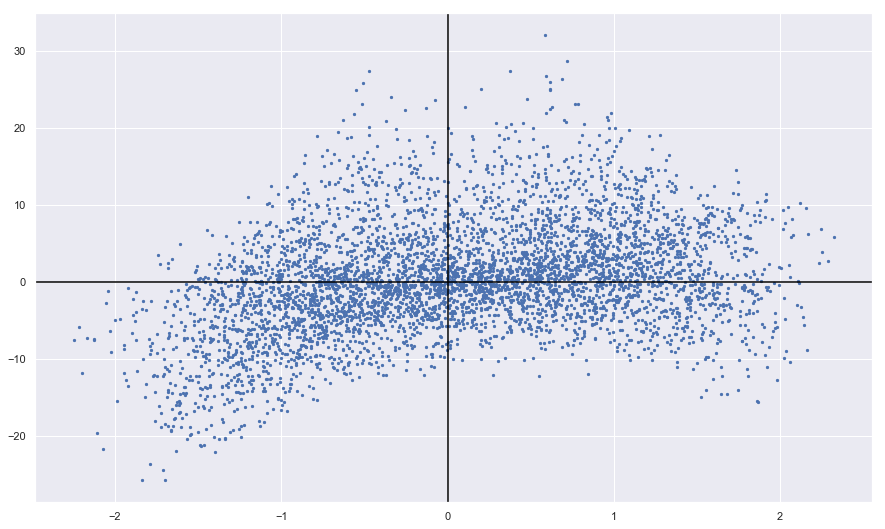

In [18]:
plt.figure(figsize=(15, 9))
poly_b_d = m_best.decision_function(data.iloc[:,0:4])
plt.scatter(poly_b_d,poly(data_orig),s=5)
plt.axhline(0, color='black') # x = 0
plt.axvline(0, color='black') # y = 0

## STEP 6

SVM classification using Radial Kernel 

In [17]:
m2 = SVC(kernel='rbf', C = 10, gamma = 1)
m2.fit(x_train, y_train)
y_pred_tr = m2.predict(x_train)
S = sum(m2.n_support_)
ratio = round(S/len(x_train), 3)
PredTrain = round(accuracy_score(y_train, y_pred_tr), 4)
print('Number S of support vectors for radial Kernel: ', S)
print('Ratio of support vectors for radial Kernel: ', ratio)
print('Percentages of correct prediction for Training set:', PredTrain, '\n', '\n')
trp = round(PredTrain + 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
trm = round(PredTrain - 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
print('Confidence Interval for Train set is: (', trp, ';', trm, ')', '\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class'], margins=True) ,'\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1), '\n','\n')

y_pred_ts = m2.predict(x_test)
PredTest = round(accuracy_score(y_test,y_pred_ts), 4)
print('Percentages of correct prediction for Test set:', PredTest,'\n','\n')
tsp = round(PredTest + 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
tsm = round(PredTest - 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
print('Confidence Interval for Test set is: (', tsp, ';', tsm, ')', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class'], margins=True),'\n','\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1))

Number S of support vectors for radial Kernel:  426
Ratio of support vectors for radial Kernel:  0.106
Percentages of correct prediction for Training set: 0.9955 
 

Confidence Interval for Train set is: ( 0.9976 ; 0.9934 ) 
 

Predicted class    -1     1   All
True class                       
-1               1992     6  1998
1                  12  1990  2002
All              2004  1996  4000 
 

Predicted class     -1      1
True class                   
-1               0.997  0.003
 1               0.006  0.994 
 

Percentages of correct prediction for Test set: 0.977 
 

Confidence Interval for Test set is: ( 0.9863 ; 0.9677 ) 

Predicted class   -1    1   All
True class                     
-1               496    6   502
1                 17  481   498
All              513  487  1000 
 

Predicted class      -1       1
True class                     
-1               0.9880  0.0120
 1               0.0341  0.9659
Wall time: 186 ms


In [18]:
mscl = 1 - PredTrain
tsp = round(mscl + 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
tsm = round(mscl - 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
print('Classification Error for the Training set:', round(mscl, 4))
print('Confidence Interval of the classification errors for Training set is: (', tsp, ';', tsm, ')', '\n')
mscl = 1 - PredTest
tsp = round(mscl + 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
tsm = round(mscl - 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
print('Classification Error for the Test set:', round(mscl, 4))
print('Confidence Interval of the classification errors for Test set is: (', tsp, ';', tsm, ')', '\n')

Classification Error for the Training set: 0.0045
Confidence Interval of the classification errors for Training set is: ( 0.0086 ; 0.0004 ) 

Classification Error for the Test set: 0.023
Confidence Interval of the classification errors for Test set is: ( 0.0323 ; 0.0137 ) 

Wall time: 0 ns


## STEP 7

Optimization of the parameters 'Cost' and 'Gamma'

In [19]:
def svc_param_selection(X, y, nfolds):
    Cs = [2, 5, 10, 15, 30, 50]
    gammas = [0.001, 0.01, 0.1, 0.25, 0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
print('The best value of parameter \'Cost\' for Train Set', svc_param_selection(x_train, y_train, 10))

The best value of parameter 'Cost' for Train Set {'C': 50, 'gamma': 0.1}
Wall time: 1min 7s


## STEP 8

SVM classification using Radial Kernel with best parameters 'Cost' and 'Gamma'

In [20]:
m_best = SVC(kernel='rbf', C = 50, gamma = 0.25)
m_best.fit(x_train, y_train)
y_pred_tr = m_best.predict(x_train)
S = sum(m_best.n_support_)
ratio = round(S/len(x_train), 3)
PredTrain = round(accuracy_score(y_train, y_pred_tr), 4)
print('Number S of support vectors for radial Kernel: ', S)
print('Ratio of support vectors for radial Kernel: ', ratio)
print('Percentages of correct prediction for Training set:', PredTrain, '\n', '\n')
trp = round(PredTrain + 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
trm = round(PredTrain - 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
print('Confidence Interval for Train set is: (', trp, ';', trm, ')', '\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class'], margins=True) ,'\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1))

y_pred_ts = m_best.predict(x_test)
PredTest = round(accuracy_score(y_test,y_pred_ts), 4)
print('Percentages of correct prediction for Test set:', PredTest,'\n','\n')
tsp = round(PredTest + 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
tsm = round(PredTest - 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
print('Confidence Interval for Test set is: (', tsp, ';', tsm, ')', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class'], margins=True),'\n','\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1))

Number S of support vectors for radial Kernel:  260
Ratio of support vectors for radial Kernel:  0.065
Percentages of correct prediction for Training set: 0.9958 
 

Confidence Interval for Train set is: ( 0.9978 ; 0.9938 ) 
 

Predicted class    -1     1   All
True class                       
-1               1990     8  1998
1                   9  1993  2002
All              1999  2001  4000 
 

Predicted class      -1       1
True class                     
-1               0.9960  0.0040
 1               0.0045  0.9955
Percentages of correct prediction for Test set: 0.99 
 

Confidence Interval for Test set is: ( 0.9962 ; 0.9838 ) 

Predicted class   -1    1   All
True class                     
-1               499    3   502
1                  7  491   498
All              506  494  1000 
 

Predicted class      -1       1
True class                     
-1               0.9940  0.0060
 1               0.0141  0.9859
Wall time: 177 ms


In [19]:
mscl = 1 - PredTrain
tsp = round(mscl + 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
tsm = round(mscl - 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
print('Classification Error for the Training set:', round(mscl, 4))
print('Confidence Interval of the classification errors for Training set is: (', tsp, ';', tsm, ')', '\n')
mscl = 1 - PredTest
tsp = round(mscl + 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
tsm = round(mscl - 1.96*(np.sqrt(mscl*(1 - mscl))/np.sqrt(len(x_test))), 4)
print('Classification Error for the Test set:', round(mscl, 4))
print('Confidence Interval of the classification errors for Test set is: (', tsp, ';', tsm, ')', '\n')

Classification Error for the Training set: 0.384
Confidence Interval of the classification errors for Training set is: ( 0.4141 ; 0.3539 ) 

Classification Error for the Test set: 0.344
Confidence Interval of the classification errors for Test set is: ( 0.3734 ; 0.3146 ) 



Comparison of results obtaining through POLY function and Radial Kernel

Wall time: 45.9 ms


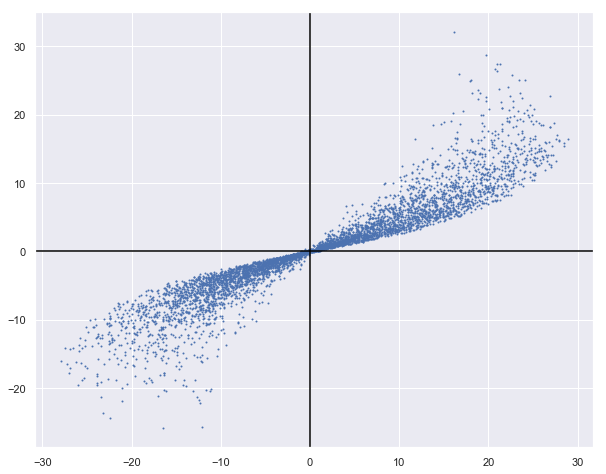

In [23]:
plt.figure(figsize=(10, 8))
rad_b_d = m_best.decision_function(data_sc.iloc[:,0:4])
plt.scatter(rad_b_d,poly(data_orig), s=1)
plt.axhline(0, color='black') # x = 0
plt.axvline(0, color='black') # y = 0

## STEP 9

SVM classification using a Polynomial Kernel 

In [24]:
m3 = SVC(kernel='poly', C = 30, gamma = 'auto', coef0 = 1)
m3.fit(x_train, y_train)
y_pred_tr = m3.predict(x_train)
S = sum(m3.n_support_)
ratio = round(S/len(x_train), 3)
PredTrain = round(accuracy_score(y_train, y_pred_tr), 4)
print('Number S of support vectors for radial Kernel: ', S)
print('Ratio of support vectors for radial Kernel: ', ratio)
print('Percentages of correct prediction for Training set:', PredTrain, '\n', '\n')
trp = round(PredTrain + 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
trm = round(PredTrain - 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(x_train))), 4)
print('Confidence Interval for Train set is: (', trp, ';', trm, ')', '\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class'], margins=True) ,'\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1))

y_pred_ts = m3.predict(x_test)
PredTest = round(accuracy_score(y_test, y_pred_ts), 4)
print('Percentages of correct prediction for Training set:', PredTest, '\n', '\n')
tsp = round(PredTest + 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
tsm = round(PredTest - 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(x_test))), 4)
print('Confidence Interval for Test set is: (', tsp, ';', tsm, ')', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class'], margins=True) ,'\n', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1))

Number S of support vectors for radial Kernel:  162
Ratio of support vectors for radial Kernel:  0.04
Percentages of correct prediction for Training set: 0.9962 
 

Confidence Interval for Train set is: ( 0.9981 ; 0.9943 ) 
 

Predicted class    -1     1   All
True class                       
-1               1991     7  1998
1                   8  1994  2002
All              1999  2001  4000 
 

Predicted class      -1       1
True class                     
-1               0.9965  0.0035
 1               0.0040  0.9960
Percentages of correct prediction for Training set: 0.991 
 

Confidence Interval for Test set is: ( 0.9969 ; 0.9851 ) 

Predicted class   -1    1   All
True class                     
-1               499    3   502
1                  6  492   498
All              505  495  1000 
 

Predicted class     -1      1
True class                   
-1               0.994  0.006
 1               0.012  0.988
Wall time: 161 ms


In [22]:
mscltr = 1 - PredTrain
cler_ptr = round(mscltr + 1.96*(np.sqrt(mscltr*(1 - mscltr))/np.sqrt(len(x_train))), 4)
cler_mtr = round(mscltr - 1.96*(np.sqrt(mscltr*(1 - mscltr))/np.sqrt(len(x_train))), 4)
print('Classification Error for the Training set:', round(mscltr, 4))
print('Confidence Interval of the classification errors for Training set is: (', cler_mtr, ';', cler_ptr, ')', '\n')
msclts = 1 - PredTest
cler_pts = round(msclts + 1.96*(np.sqrt(msclts*(1 - msclts))/np.sqrt(len(x_test))), 4)
cler_mts = round(msclts - 1.96*(np.sqrt(msclts*(1 - msclts))/np.sqrt(len(x_test))), 4)
print('Classification Error for the Test set:', round(msclts, 4))
print('Confidence Interval of the classification errors for Test set is: (', cler_mts, ';', cler_pts, ')', '\n')

Classification Error for the Training set: 0.384
Confidence Interval of the classification errors for Training set is: ( 0.3689 ; 0.3991 ) 

Classification Error for the Test set: 0.344
Confidence Interval of the classification errors for Test set is: ( 0.3146 ; 0.3734 ) 



Optimization of the parameters 'Cost' and 'A'

In [26]:
%%time
#Select 5 values for cost and 5 values for gamma and evaluate the performance of the "best" cost and gamma pair
def svc_param_selection(X, y, nfolds):
    Cs = [5, 7, 10, 15, 30]
    coefs = [1,5,10,15,20]
    param_grid = {'C': Cs, 'coef0' : coefs}
    grid_search = GridSearchCV(SVC(kernel='poly', degree = 4, gamma = 'auto'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print('The best value of parameter \'A\' for Train Set', svc_param_selection(x_train, y_train, 10))

The best value of parameter 'A' for Train Set {'C': 10, 'coef0': 20}
Wall time: 5min 36s


## STEP 10

SVM classification by polynomial kernel with best parameters 'Cost' and 'A'

In [27]:
m_best = SVC(kernel='poly', C = 30, gamma = 'auto', coef0 = 20)
m_best.fit(x_train, y_train)
y_pred_tr = m_best.predict(x_train)
S = sum(m_best.n_support_)
ratio = round(S/len(x_train), 3)
PredTrain = round(accuracy_score(y_train, y_pred_tr), 4)
print('Number S of support vectors for radial Kernel: ', S)
print('Ratio of support vectors for radial Kernel: ', ratio)
print('Percentages of correct prediction for Training set:', PredTrain, '\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class'], margins=True) ,'\n', '\n')
print(pd.crosstab(y_train, y_pred_tr, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1))

y_pred_ts = m_best.predict(x_test)
PredTest = round(accuracy_score(y_test, y_pred_ts), 4)
print('Percentages of correct prediction for Test set:', PredTest, '\n', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class'], margins=True) ,'\n', '\n')
print(pd.crosstab(y_test, y_pred_ts, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1))

Number S of support vectors for radial Kernel:  62
Ratio of support vectors for radial Kernel:  0.016
Percentages of correct prediction for Training set: 0.9998 
 

Predicted class    -1     1   All
True class                       
-1               1998     0  1998
1                   1  2001  2002
All              1999  2001  4000 
 

Predicted class      -1       1
True class                     
-1               1.0000  0.0000
 1               0.0005  0.9995
Percentages of correct prediction for Test set: 0.995 
 

Predicted class   -1    1   All
True class                     
-1               501    1   502
1                  4  494   498
All              505  495  1000 
 

Predicted class     -1      1
True class                   
-1               0.998  0.002
 1               0.008  0.992
Wall time: 2.11 s


Comparison of results obtaining through POLY function and Polynomial Kernel

Wall time: 31.9 ms


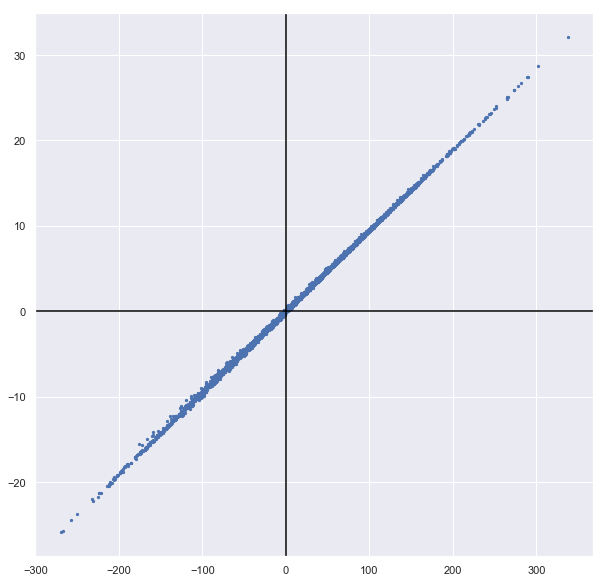

In [28]:
plt.figure(figsize=(10, 10))
poly_b_d = m_best.decision_function(data_sc.iloc[:,0:4])
plt.scatter(poly_b_d, poly(data_orig), s=5)
plt.axhline(0, color='black') # x = 0
plt.axvline(0, color='black') # y = 0